# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-21 13:24:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   166MB/s    in 0.6s    

2023-02-21 13:24:13 (166 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizzasteak/train/

ls: cannot access 'pizzasteak/train/': No such file or directory


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

### Get the class names programmatically

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img




['2018173.jpg']
Image shape: (512, 512, 3)


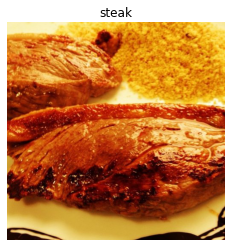

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",target_class="steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[250, 242, 169],
        [250, 242, 169],
        [250, 242, 170],
        ...,
        [251, 230, 151],
        [251, 230, 151],
        [251, 230, 149]],

       [[249, 241, 168],
        [249, 241, 168],
        [249, 241, 169],
        ...,
        [251, 230, 151],
        [251, 230, 149],
        [251, 230, 149]],

       [[249, 241, 169],
        [249, 241, 169],
        [249, 240, 171],
        ...,
        [249, 231, 149],
        [249, 231, 147],
        [250, 232, 148]],

       ...,

       [[ 32,   9,   3],
        [ 32,   9,   3],
        [ 32,   9,   3],
        ...,
        [ 75,  20,   0],
        [ 71,  13,   2],
        [ 76,  15,  10]],

       [[ 31,   8,   2],
        [ 31,   8,   2],
        [ 32,   9,   3],
        ...,
        [ 85,  21,  11],
        [ 93,  25,  24],
        [ 82,  13,  16]],

       [[ 31,   8,   2],
        [ 31,   8,   2],
        [ 31,   8,   2],
        ...,
        [ 88,  20,  1

In [11]:
img.shape

(512, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.


array([[[0.98039216, 0.94901961, 0.6627451 ],
        [0.98039216, 0.94901961, 0.6627451 ],
        [0.98039216, 0.94901961, 0.66666667],
        ...,
        [0.98431373, 0.90196078, 0.59215686],
        [0.98431373, 0.90196078, 0.59215686],
        [0.98431373, 0.90196078, 0.58431373]],

       [[0.97647059, 0.94509804, 0.65882353],
        [0.97647059, 0.94509804, 0.65882353],
        [0.97647059, 0.94509804, 0.6627451 ],
        ...,
        [0.98431373, 0.90196078, 0.59215686],
        [0.98431373, 0.90196078, 0.58431373],
        [0.98431373, 0.90196078, 0.58431373]],

       [[0.97647059, 0.94509804, 0.6627451 ],
        [0.97647059, 0.94509804, 0.6627451 ],
        [0.97647059, 0.94117647, 0.67058824],
        ...,
        [0.97647059, 0.90588235, 0.58431373],
        [0.97647059, 0.90588235, 0.57647059],
        [0.98039216, 0.90980392, 0.58039216]],

       ...,

       [[0.1254902 , 0.03529412, 0.01176471],
        [0.1254902 , 0.03529412, 0.01176471],
        [0.1254902 , 0

## An end-to-end example

* Load our images
* Preprocess
* Build a CNN
* Compile our CNN
* Fit the cnn

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths for our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 246ms/step - loss: 0.5901 - accuracy: 0.6913 - val_loss: 0.4884 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4509 - accuracy: 0.7900 - val_loss: 0.3931 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4112 - accuracy: 0.8160 - val_loss: 0.3464 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3799 - accuracy: 0.8433 - val_loss: 0.3144 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3492 - accuracy: 0.8567 - val_loss: 0.3168 - val_accuracy: 0.8900


## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

In [14]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_2 = model_2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 211ms/step - loss: 0.7587 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_3 = model_3.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 215ms/step - loss: 2.6259 - accuracy: 0.6267 - val_loss: 0.6957 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 1.1497 - accuracy: 0.6687 - val_loss: 0.6643 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6614 - accuracy: 0.7327 - val_loss: 0.9280 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5357 - accuracy: 0.7673 - val_loss: 0.4759 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5556 - accuracy: 0.7667 - val_loss: 0.9389 - val_accuracy: 0.6160


## Binary Classification: Let's break it down

1. Become one with data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters  andd improve the model
7. Repeat until satisfied

### 1. Become one with the data

['2893892.jpg']
Image shape: (512, 512, 3)
['3917951.jpg']
Image shape: (512, 512, 3)


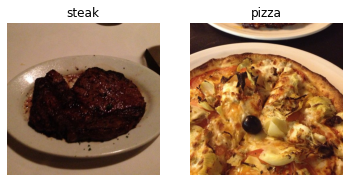

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocessing the data

In [17]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn our data into **batches**.

In [18]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [19]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [21]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create a CNN model (start with a baseline)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size = 3,
           strides = 1, 
           padding = "valid",
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])


In [24]:
# Compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])


In [25]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [26]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 231ms/step - loss: 0.7055 - accuracy: 0.6787 - val_loss: 0.9649 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4679 - accuracy: 0.7967 - val_loss: 0.4497 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3256 - accuracy: 0.8660 - val_loss: 0.4325 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.1738 - accuracy: 0.9413 - val_loss: 0.4106 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.0624 - accuracy: 0.9867 - val_loss: 0.4556 - val_accuracy: 0.8220


### 5. Evaluating our model

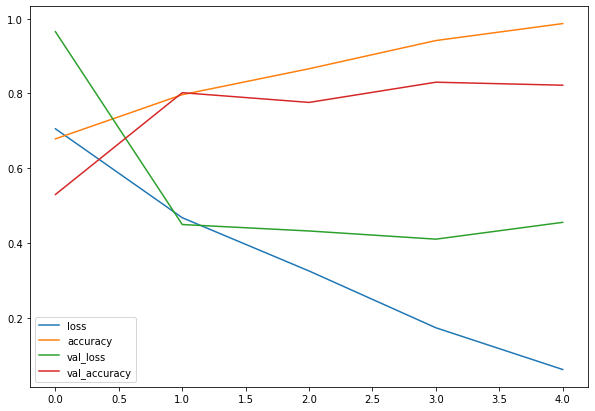

In [27]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize =(10,7))

In [28]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training an validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

When a model validation loss starts to increase, it's likely the model is overfitting

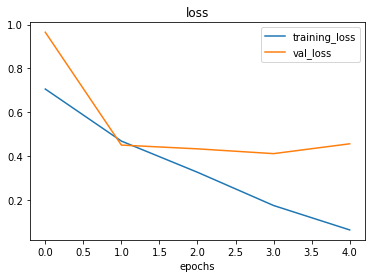

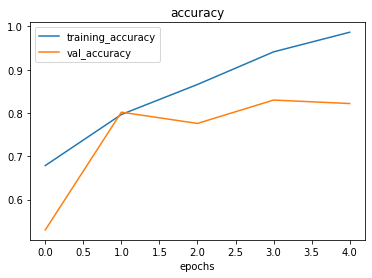

In [29]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense lates

Reduce overfitting"

* Add data augmentation
* Add regularization layers (such as MaxPool2D

In [30]:
# Create our model (new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [31]:
model_5.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = 'accuracy')

In [32]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 201ms/step - loss: 0.6126 - accuracy: 0.6400 - val_loss: 0.5116 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5108 - accuracy: 0.7647 - val_loss: 0.4056 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4642 - accuracy: 0.7907 - val_loss: 0.4423 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4544 - accuracy: 0.8033 - val_loss: 0.3545 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3880 - accuracy: 0.8393 - val_loss: 0.3343 - val_accuracy: 0.8540


In [33]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

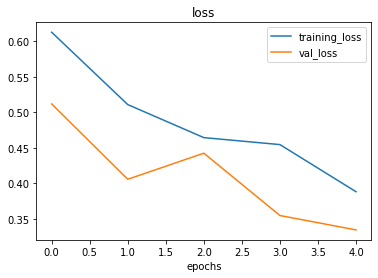

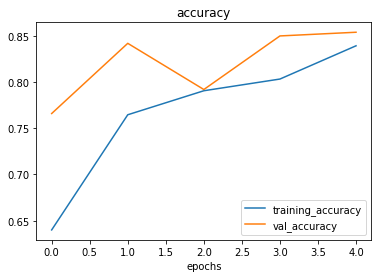

In [34]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [35]:

# Create ImageDataGenerator with data augmentation

train_datagen_aug = ImageDataGenerator(rescale =1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)

# For test:
test_datagen = ImageDataGenerator(rescale=1/255.)

In [36]:
# Visualize data augmentation

print("Augmented training data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = 'binary',
                                                    shuffle = False)


print('Non augmented training data: ')
train_data = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = 'binary',
                                                    shuffle = False)

print('Non augmented test data: ')
test_data = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = 'binary',
                                                    shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data: 
Found 1500 images belonging to 2 classes.
Non augmented test data: 
Found 500 images belonging to 2 classes.


Data augmentation is usually only permormed on the training data

In [37]:
# Get sample data batches
images,labels = train_data.next()
aug_images,aug_labels = train_data_aug.next()

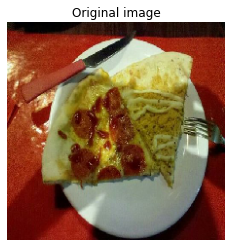

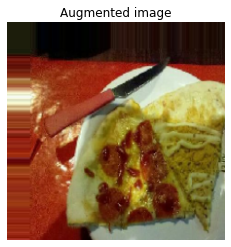

In [38]:
# SHow original and augmented images
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

In [39]:
# Create a model on augmented training data


model_6 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [40]:
model_6.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = 'accuracy')

In [41]:
history_6 = model_6.fit(train_data_aug,
                        epochs = 5,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 530ms/step - loss: 0.7284 - accuracy: 0.4873 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6936 - accuracy: 0.4793 - val_loss: 0.6911 - val_accuracy: 0.5300
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6935 - accuracy: 0.4753 - val_loss: 0.6869 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6938 - accuracy: 0.5173 - val_loss: 0.6867 - val_accuracy: 0.5880
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.7002 - accuracy: 0.5707 - val_loss: 0.6348 - val_accuracy: 0.7860


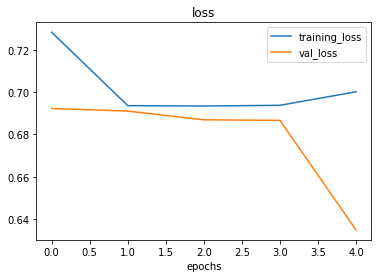

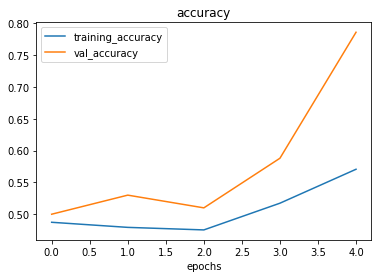

In [42]:
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model

In [43]:
# Visualize data augmentation

print("Augmented training data")
train_data_aug_shuf = train_datagen_aug.flow_from_directory(train_dir,
                                                    target_size = (224,224),
                                                    batch_size=32,
                                                    class_mode = 'binary',
                                                    shuffle = True)



Augmented training data
Found 1500 images belonging to 2 classes.


In [44]:

model_7 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = 'accuracy')

history_7 = model_7.fit(train_data_aug_shuf,
                        epochs = 5,
                        steps_per_epoch = len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 528ms/step - loss: 0.6870 - accuracy: 0.5647 - val_loss: 0.6256 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6172 - accuracy: 0.6747 - val_loss: 0.5900 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5492 - accuracy: 0.7333 - val_loss: 0.4296 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5321 - accuracy: 0.7380 - val_loss: 0.4208 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4986 - accuracy: 0.7520 - val_loss: 0.3676 - val_accuracy: 0.8360


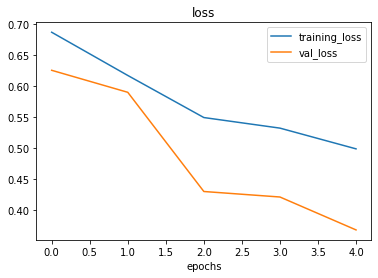

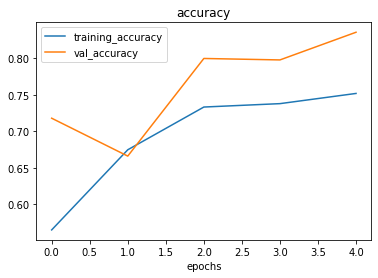

In [45]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

* Increase the number of model layers
* Increase the number of filters in each conv layer
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **transfer learning** 

In [46]:

model_8 = Sequential([
    Conv2D(32,3,activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(32,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(32,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(32,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = 'accuracy')

history_8 = model_8.fit(train_data_aug_shuf,
                        epochs = 7,
                        steps_per_epoch = len(train_data_aug_shuf),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/7
47/47 [==============================] - 28s 545ms/step - loss: 0.6395 - accuracy: 0.6147 - val_loss: 0.5035 - val_accuracy: 0.7480
Epoch 2/7
47/47 [==============================] - 25s 535ms/step - loss: 0.5385 - accuracy: 0.7167 - val_loss: 0.4152 - val_accuracy: 0.8400
Epoch 3/7
47/47 [==============================] - 25s 539ms/step - loss: 0.5162 - accuracy: 0.7640 - val_loss: 0.3516 - val_accuracy: 0.8560
Epoch 4/7
47/47 [==============================] - 25s 531ms/step - loss: 0.4776 - accuracy: 0.7733 - val_loss: 0.3374 - val_accuracy: 0.8800
Epoch 5/7
47/47 [==============================] - 25s 537ms/step - loss: 0.4628 - accuracy: 0.7780 - val_loss: 0.3371 - val_accuracy: 0.8400
Epoch 6/7
47/47 [==============================] - 25s 532ms/step - loss: 0.4504 - accuracy: 0.7880 - val_loss: 0.3451 - val_accuracy: 0.8420
Epoch 7/7
47/47 [==============================] - 25s 530ms/step - loss: 0.4215 - accuracy: 0.8147 - val_loss: 0.2918 - val_accuracy: 0.8760


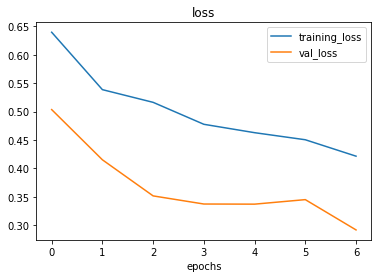

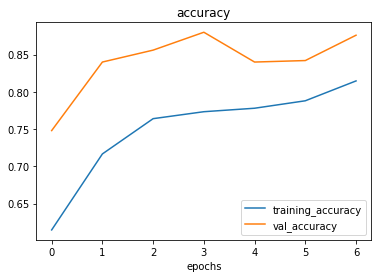

In [47]:
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [48]:
print(class_names)

['pizza' 'steak']


--2023-02-21 13:37:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-02-21 13:37:08 (29.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



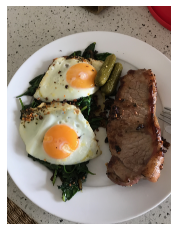

In [49]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [50]:
steak.shape

(4032, 3024, 3)

In [51]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [52]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to
   (img_shape,img_shape,colour_channels).
   """
   #Read the image
  img = tf.io.read_file(filename)
   #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape,img_shape])
  img = img/255.

  return img
  

In [53]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [54]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 197ms/step


The model currently outputs a prediction probability

In [55]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [56]:
def pred_and_plot(model,filename,class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_classs = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


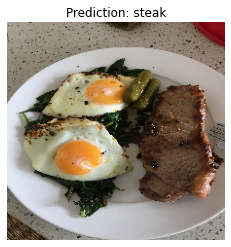

In [57]:
pred_and_plot(model_7,"03-steak.jpeg")

# Multi-class Image Classification

## 1. Import and become one with the data

In [59]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-02-21 13:59:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 172.253.119.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   198MB/s    in 2.5s    

2023-02-21 13:59:54 (198 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [60]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [61]:
# Steup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [63]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1137400.jpg']
Image shape: (512, 512, 3)


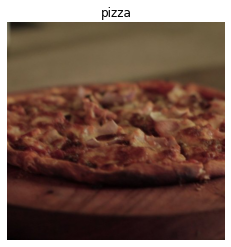

In [76]:
# Visualize
import random

img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )

test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [82]:
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = 'softmax')
])

model_8.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### 4. Fit a model

In [83]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 227ms/step - loss: 2.1972 - accuracy: 0.1977 - val_loss: 2.0797 - val_accuracy: 0.2328
Epoch 2/5
235/235 [==============================] - 63s 267ms/step - loss: 1.8665 - accuracy: 0.3756 - val_loss: 1.9237 - val_accuracy: 0.3376
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 1.3623 - accuracy: 0.5501 - val_loss: 2.0719 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 55s 236ms/step - loss: 0.6485 - accuracy: 0.7879 - val_loss: 2.6913 - val_accuracy: 0.2896
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 0.1952 - accuracy: 0.9405 - val_loss: 4.0052 - val_accuracy: 0.2672


### 5. Evaluate the model

In [85]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 4.0052 - accuracy: 0.2672


[4.005173206329346, 0.2671999931335449]

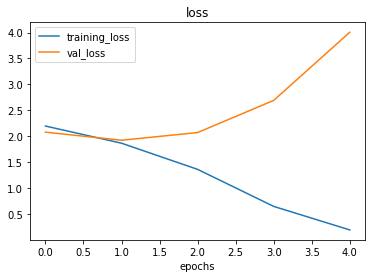

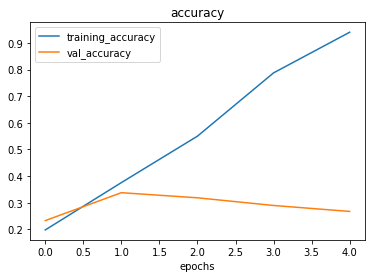

In [86]:
plot_loss_curves(history_8)

### 6. Adjust the model hyperparameters

Try and fix overfitting by...

* **Get more data**
* **Simplify the model** - reduce number of layers or number of hidden units in layers
* **Data augmentation** - add more diversity to the training data
* **Use transfer learning**

In [87]:
#Simplify the model - remove 2 convolutional layers
model_9 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = 'softmax')
])

model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 201ms/step - loss: 2.0951 - accuracy: 0.2493 - val_loss: 1.9383 - val_accuracy: 0.3148
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.7536 - accuracy: 0.3989 - val_loss: 1.8885 - val_accuracy: 0.3420
Epoch 3/5
235/235 [==============================] - 47s 201ms/step - loss: 1.3470 - accuracy: 0.5639 - val_loss: 2.0111 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 53s 226ms/step - loss: 0.8728 - accuracy: 0.7264 - val_loss: 2.3903 - val_accuracy: 0.2932
Epoch 5/5
235/235 [==============================] - 48s 204ms/step - loss: 0.4640 - accuracy: 0.8665 - val_loss: 2.7016 - val_accuracy: 0.2932


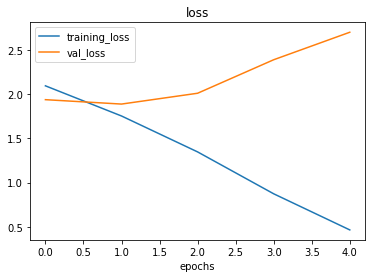

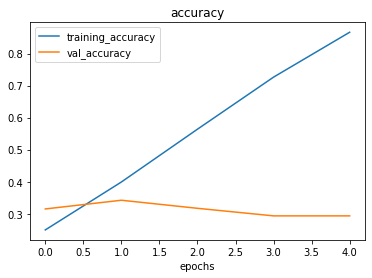

In [88]:
plot_loss_curves(history_9)

Looks like simplifying the model didn't work. The accuracy went down and overfitting continued

### Trying to reduce overfitting with data augmentation

In [89]:
train_datagen_aug = ImageDataGenerator(rescale =1/255.,
                                       rotation_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip = True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                      target_size = (224,224),
                                                       batch_size=32,
                                                       class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [92]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_10 = model_10.fit(train_data_aug,
                        epochs = 5,
                        steps_per_epoch= len(train_data_aug),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 542ms/step - loss: 2.2044 - accuracy: 0.1783 - val_loss: 2.0590 - val_accuracy: 0.2464
Epoch 2/5
235/235 [==============================] - 125s 531ms/step - loss: 2.0615 - accuracy: 0.2661 - val_loss: 1.9074 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 125s 532ms/step - loss: 1.9752 - accuracy: 0.3043 - val_loss: 1.8014 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 122s 518ms/step - loss: 1.9206 - accuracy: 0.3276 - val_loss: 1.8351 - val_accuracy: 0.3584
Epoch 5/5
235/235 [==============================] - 132s 563ms/step - loss: 1.8885 - accuracy: 0.3464 - val_loss: 1.7695 - val_accuracy: 0.3876


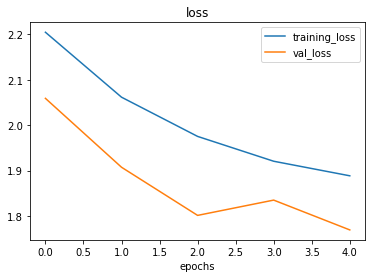

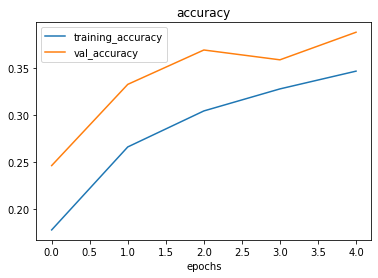

In [94]:
plot_loss_curves(history_10)

### 7. Repeat until satisfied

Bring our loss curvers closer together and trying to improve the accuracy

- Restructuring the model architecture
- adjust the learning rate
- Try different methods for data augmentation
- fit for more epochs
- try *transfer learning*


### Making a prediction with our trained model

In [95]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-21 15:26:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-02-21 15:26:36 (40.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-02-21 15:26:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting

In [100]:
# Reconfig to work on multiclass
def pred_and_plot(model,filename,class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title
  """

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0]) >1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_classs = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 33ms/step


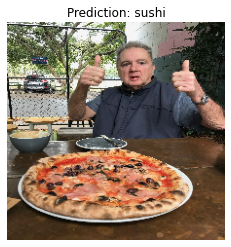

In [101]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename = "03-pizza-dad.jpeg",
             class_names=class_names)

1/1 [==============================] - 0s 54ms/step


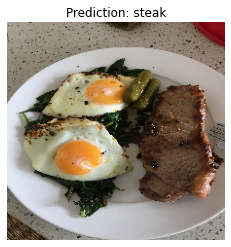

In [102]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename = "03-steak.jpeg",
             class_names=class_names)

1/1 [==============================] - 0s 24ms/step


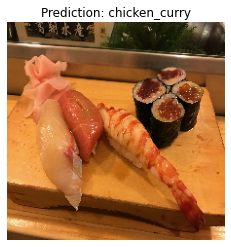

In [103]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename = "03-sushi.jpeg",
             class_names=class_names)

1/1 [==============================] - 0s 33ms/step


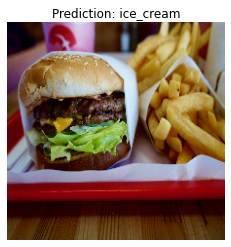

In [104]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
             filename = "03-hamburger.jpeg",
             class_names=class_names)

The model didn't perform weel on our custom data

## Saving and loading our model

In [105]:
model_10.save("saved_trained_model_10")

In [106]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")